In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from sklearn.datasets import load_digits

In [4]:
digits, target = load_digits(return_X_y=True)

In [5]:
digits

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

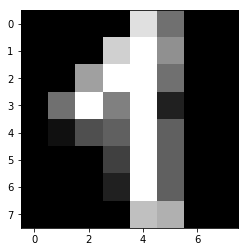

In [6]:
plt.imshow(digits[70].reshape(8,8),cmap='gray')

In [7]:
def reshape_images(images):
    reshaped_images = []
    for i in range(len(images)):
        reshaped_images.append(images[i].reshape(8,8,1))
    return np.array(reshaped_images)

In [8]:
digits[0].shape

(64,)

In [9]:
images = digits

In [10]:
images[0].shape

(64,)

In [11]:
from sklearn.svm import SVC

In [12]:
clf = SVC(gamma=0.001, C=300, decision_function_shape='ovo')

In [13]:
len(images)

1797

In [14]:
539 + 1258

1797

In [16]:
X_train = digits[:1258]
X_test = digits[1258:]
y_train = target[:1258]
y_test = target[1258:]

In [17]:
clf.fit(X_train, y_train)

SVC(C=300, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
prediction = clf.predict(X_test)

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        53
          1       0.96      1.00      0.98        53
          2       1.00      0.98      0.99        53
          3       0.96      0.91      0.93        53
          4       0.98      0.95      0.96        56
          5       0.95      0.98      0.96        56
          6       0.98      0.98      0.98        54
          7       1.00      1.00      1.00        54
          8       0.94      0.98      0.96        52
          9       0.95      0.96      0.95        55

avg / total       0.97      0.97      0.97       539



In [21]:
images = reshape_images(digits)

In [22]:
from keras.layers import Dense, Dropout, Conv2D,MaxPool2D,Flatten
from keras.models import Sequential

In [25]:
targets = keras.utils.to_categorical(target, num_classes=10)

In [26]:
targets[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# USING ANN

In [27]:
model = Sequential([
    Dense(units=16,kernel_initializer='uniform', activation='relu', input_shape=(64,)),
    Dropout(rate=0.4),
    Dense(units=12,kernel_initializer='uniform', activation='relu'),
    Dense(units=10,kernel_initializer='uniform', activation='softmax')
])

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
X_train = digits[:1258]
X_test = digits[1258:]
y_train = targets_[:1258]
y_test = targets_[1258:]

In [30]:
X_train.shape

(1258, 64)

In [31]:
hist = model.fit(X_train, y_train, epochs=100,batch_size=10,validation_data=(X_test,y_test),validation_split=0.25)

Train on 1258 samples, validate on 539 samples
Epoch 1/100
1258/1258 [==============================] - 1s 957us/step - loss: 2.1974 - acc: 0.1741 - val_loss: 1.8341 - val_acc: 0.3377
Epoch 2/100
1258/1258 [==============================] - 0s 246us/step - loss: 1.5433 - acc: 0.4134 - val_loss: 1.1616 - val_acc: 0.7161
Epoch 3/100
1258/1258 [==============================] - 0s 222us/step - loss: 1.1524 - acc: 0.5787 - val_loss: 0.9607 - val_acc: 0.7050
Epoch 4/100
1258/1258 [==============================] - 0s 236us/step - loss: 0.9951 - acc: 0.6407 - val_loss: 0.8112 - val_acc: 0.7885
Epoch 5/100
1258/1258 [==============================] - 0s 257us/step - loss: 0.8557 - acc: 0.6868 - val_loss: 0.7405 - val_acc: 0.8275
Epoch 6/100
1258/1258 [==============================] - 0s 244us/step - loss: 0.7981 - acc: 0.7178 - val_loss: 0.7032 - val_acc: 0.8367
Epoch 7/100
1258/1258 [==============================] - 0s 230us/step - loss: 0.7401 - acc: 0.7353 - val_loss: 0.6546 - val_acc: 0

In [33]:
history = hist

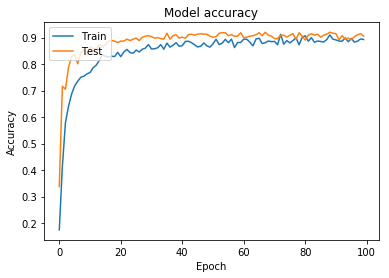

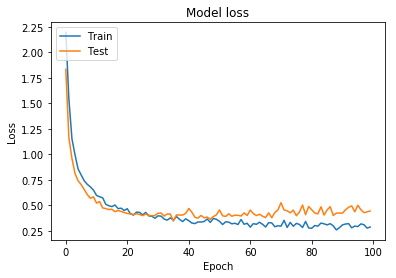

In [34]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [35]:
pred = model.predict_classes(X_test)

In [36]:
pred

array([0, 5, 3, 6, 9, 6, 4, 7, 5, 4, 4, 7, 2, 2, 2, 2, 5, 7, 9, 5, 4, 1,
       8, 4, 9, 0, 8, 9, 8, 0, 9, 2, 3, 4, 5, 1, 7, 8, 9, 0, 1, 2, 3, 6,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 5, 7, 8, 2, 0, 1, 2, 6,
       3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 6, 2, 8, 3, 0, 0, 1,
       7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 6, 3, 1, 4, 0, 8,
       3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4,
       9, 0, 8, 0, 1, 2, 3, 4, 5, 6, 7, 9, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8,
       9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8,
       4, 9, 7, 7, 3, 5, 9, 0, 0, 2, 2, 7, 8, 2, 0, 9, 2, 6, 3, 3, 7, 3,
       3, 4, 6, 6, 6, 4, 9, 9, 5, 0, 9, 5, 2, 2, 2, 0, 0, 9, 7, 6, 3, 2,
       1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 9, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 9, 9,
       8, 0, 1, 2, 3, 4, 5, 1, 8, 4, 9, 0, 1, 8, 3,

In [37]:
print(classification_report(y_test,keras.utils.to_categorical(pred)))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98        53
          1       0.83      0.83      0.83        53
          2       0.92      0.87      0.89        53
          3       0.90      0.87      0.88        53
          4       0.91      0.91      0.91        56
          5       0.93      0.95      0.94        56
          6       0.93      0.94      0.94        54
          7       0.98      0.94      0.96        54
          8       0.83      0.83      0.83        52
          9       0.84      0.95      0.89        55

avg / total       0.91      0.91      0.91       539



In [38]:
# conv way
images = reshape_images(digits)

In [39]:
X_train = images[:1258]
X_test = images[1258:]
y_train = targets[:1258]
y_test = targets[1258:]

In [95]:
cnn = Sequential([
    Conv2D(filters=128, kernel_size=(3,3), input_shape=(8,8,1),kernel_initializer='uniform'),
    MaxPool2D(),
    Conv2D(filters=64, kernel_size=(2,2),kernel_initializer='uniform'),
    MaxPool2D(),
    Dropout(0.6),
    Flatten(),
    Dense(units=16,kernel_initializer='uniform', activation='relu'),
    Dropout(rate=0.4),
    Dense(units=12,kernel_initializer='uniform', activation='relu'),
    Dense(units=10,kernel_initializer='uniform', activation='softmax')
    
])

In [97]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = cnn.fit(X_train, y_train,epochs=300, batch_size=10, validation_data=(X_test,y_test))

Train on 1258 samples, validate on 539 samples
Epoch 1/300
1258/1258 [==============================] - 3s 2ms/step - loss: 2.2910 - acc: 0.1129 - val_loss: 2.1973 - val_acc: 0.2078
Epoch 2/300
1258/1258 [==============================] - 1s 788us/step - loss: 1.9320 - acc: 0.2655 - val_loss: 1.5036 - val_acc: 0.4750
Epoch 3/300
1258/1258 [==============================] - 1s 873us/step - loss: 1.4187 - acc: 0.4730 - val_loss: 0.9864 - val_acc: 0.6698
Epoch 4/300
1258/1258 [==============================] - 1s 905us/step - loss: 1.1215 - acc: 0.5747 - val_loss: 0.8199 - val_acc: 0.7532
Epoch 5/300
1258/1258 [==============================] - 1s 843us/step - loss: 1.0276 - acc: 0.6296 - val_loss: 0.7495 - val_acc: 0.7681
Epoch 6/300
1258/1258 [==============================] - 1s 1ms/step - loss: 0.9144 - acc: 0.6558 - val_loss: 0.6828 - val_acc: 0.7477
Epoch 7/300
1258/1258 [==============================] - 1s 827us/step - loss: 0.8245 - acc: 0.6852 - val_loss: 0.6488 - val_acc: 0.788

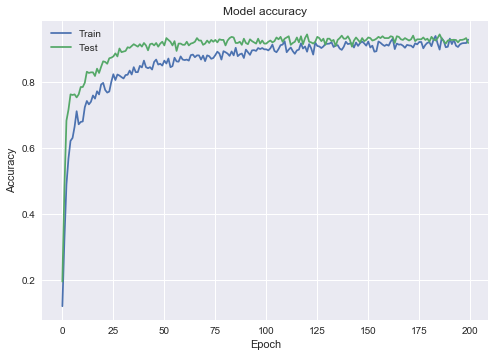

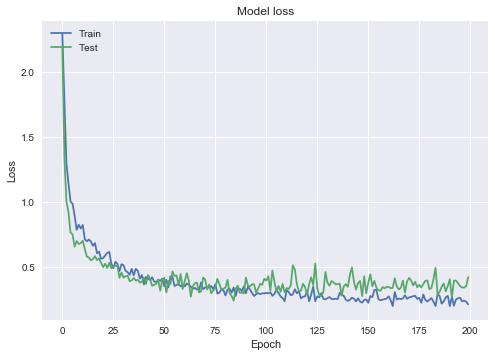

In [82]:
plt.style.use("seaborn")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [64]:
cnn.save("cnn_digit_dataset")

In [65]:
keras.utils.vis_utils.plot_model(cnn)

In [69]:
1258 *64

80512

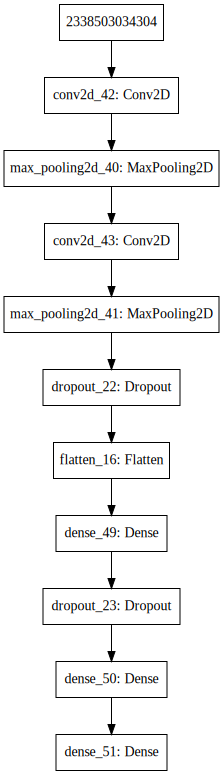

In [83]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cnn).create(prog='dot', format='svg'))

In [84]:
pred = cnn.predict_classes(X_test)

In [85]:
print(classification_report(y_test,keras.utils.to_categorical(pred)))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        53
          1       0.91      0.74      0.81        53
          2       1.00      0.98      0.99        53
          3       0.86      0.83      0.85        53
          4       0.95      0.95      0.95        56
          5       0.90      0.96      0.93        56
          6       1.00      0.93      0.96        54
          7       0.78      0.98      0.87        54
          8       0.85      0.96      0.90        52
          9       1.00      0.87      0.93        55

avg / total       0.92      0.92      0.92       539

